In [1]:
from sklearn.datasets import (
    load_diabetes,
)

loaders = {
    "diabetes": load_diabetes,
}

In [2]:
dataset = load_diabetes()
X, y = dataset["data"], dataset["target"]

In [4]:
# from decision_tree.numpy import DecisionTreeRegressor
from decision_tree.jax import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=3,
    min_samples=2,
    # feature_names=dataset["feature_names"],
    # target_names=dataset['target_names'],
)

In [5]:
model.fit(X, y)

In [6]:
model.score(X, y)

DeviceArray(0.48663616, dtype=float32)

In [7]:
from sklearn.model_selection import KFold
import numpy as np

cv_scores = []
for train_idx, test_idx in KFold(n_splits=5, shuffle=True).split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    model.fit(X_train, y_train)
    cv_scores.append(model.score(X_test, y_test))
print(np.mean(cv_scores))

0.3487238


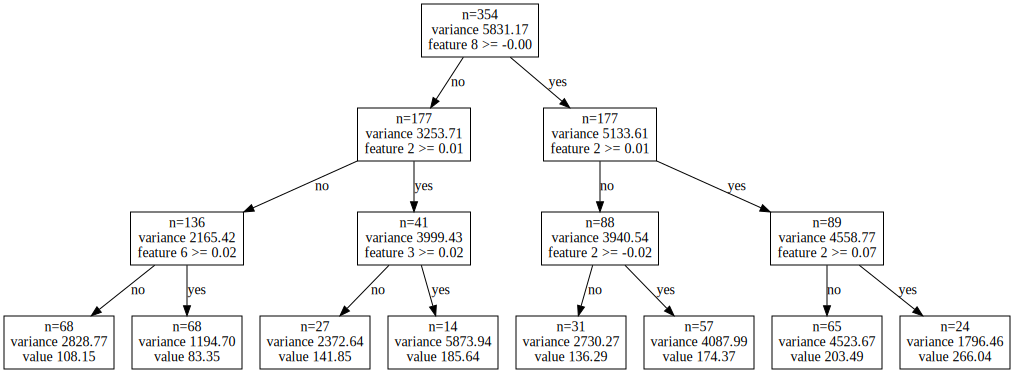

In [8]:
from graphviz import Source
from decision_tree.viz import show

Source(show(model))